In [ ]:
pip install django

In [ ]:
pip install mendeleev

In [130]:
import pandas as pd
from mendeleev import element
import numpy as np
import pickle as pickle
import matplotlib.pyplot as plt
import pymatgen as mg
from pymatgen.ext.matproj import MPRester
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# from a pandas dataframe from a pkl file.

with open("C:\\RPI\\MI2DMaterials\\BiLayer\\code\\file\\AAX_bilayer_data_dump.pkl", "rb") as f:
    data = pickle.load(f)
    
df  = pd.DataFrame(data)

In [132]:
# make another dataframe with only the jobs that are finished
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
print('Total Jobs')
print(count_row)
print(df.state.unique())
df_finished = df[df['state']=='JOB_FINISHED']


Total Jobs
345
['FAILED' 'JOB_FINISHED' 'RESTART_READY' 'RUN_TIMEOUT' 'PREPROCESSED']


In [133]:
# check for how many structures the calculation is finished
# add two rows with the stacking details and formula
print(len(df_finished))
print(len(df_finished.workflow.unique()))
df_finished[['Formula','Stacking']] = df_finished.workflow.str.split(",",expand=True)
print(df_finished.Formula.unique())
print(len(df_finished.workflow.unique()))
# 57 unique formula 

176
57
['Ir4Cl12' 'Zr2Ti2I12' 'Ti4Br12' 'Ni2Ir2Cl12' 'Mo2Ir2Br12' 'Zr2Ti2Br12'
 'Cr2Ir2Br12' 'Ti2Ni2Br12' 'Cd2Ir2I12' 'Mo2Ir2Cl12' 'Ti2Ru2Cl12'
 'Ti2Ni2Cl12' 'Cd2Ir2Br12' 'Ir2Ru2I12' 'Ir2Pd2Cl12' 'Ti4I12' 'Ir2Ru2Br12'
 'Ti2Fe2I12' 'Fe2Ir2I12' 'Ti2Au2I12' 'Ir2Au2Br12' 'Ti2Zn2Cl12' 'Ti2Ni2I12'
 'Ti2Ir2I12' 'Ir4Br12' 'Ti2Mo2I12' 'Cr2Ir2I12' 'Ti2Ru2Br12' 'Ti2Cd2Cl12'
 'Ti2Cd2I12' 'Mo2Ir2I12' 'Ti2Pd2I12' 'Ti2Au2Cl12' 'Fe2Ir2Cl12' 'Ir4I12'
 'Zn2Ir2Cl12' 'Zr2Ir2Cl12' 'Ti2Cd2Br12' 'Ni2Ir2Br12' 'Ti2Ru2I12'
 'Ni2Ir2I12' 'Ti2Cr2Br12' 'Fe2Ir2Br12' 'Zr2Ir2Br12' 'Ti2Pd2Cl12'
 'Ti2Cr2Cl12' 'Ti2Cr2I12' 'Zr2Ir2I12' 'Ti4Cl12' 'Ti2Zn2I12' 'Ti2Pd2Br12'
 'Ir2Au2Cl12' 'Zn2Ir2I12' 'Ti2Au2Br12' 'Ti2Zn2Br12' 'Ir2Au2I12'
 'Cd2Ir2Cl12']
57


C:\Users\ghosh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
df.to_csv('AAX_RAW.csv')

In [134]:
# get an idea of how many jobs finihsed for each structure
from collections import Counter
#c = Counter(list(zip(df_finished.Stacking, df_finished.Formula)))
c = Counter(list(zip(df_finished.Formula)))
#print(c)
print(type(c))
dict_count = dict(c)
#print(type(str(dict_count.keys)))

dict_count_temp = []
for key, val in dict_count.items():
    dict_count_temp.append(str([key])+ str(val))

#print(type(str(dict_count_temp)))
print(dict_count_temp[0])
dict_with_job_count = {}

count = 0 

for temp in dict_count_temp:
    #print(temp)
    val = temp[-1:]
    count = count + int(val)
    key_temp = temp[3: temp.rfind(',')]
    key = key_temp.replace("'", "")
    #print(val)
    dict_with_job_count.update({key: val})
print("\n No. of jobs for each structure")
print(dict_with_job_count)

print("\n No. of unique structure")

print(len(dict_with_job_count))

print("\n Total count of finished jobs")

print(count)

<class 'collections.Counter'>
[('Ir4Cl12',)]5

 No. of jobs for each structure
{'Ir4Cl12': '5', 'Zr2Ti2I12': '2', 'Ti4Br12': '2', 'Ni2Ir2Cl12': '3', 'Mo2Ir2Br12': '4', 'Zr2Ti2Br12': '2', 'Cr2Ir2Br12': '3', 'Ti2Ni2Br12': '4', 'Cd2Ir2I12': '5', 'Mo2Ir2Cl12': '4', 'Ti2Ru2Cl12': '5', 'Ti2Ni2Cl12': '3', 'Cd2Ir2Br12': '5', 'Ir2Ru2I12': '4', 'Ir2Pd2Cl12': '5', 'Ti4I12': '2', 'Ir2Ru2Br12': '4', 'Ti2Fe2I12': '2', 'Fe2Ir2I12': '2', 'Ti2Au2I12': '2', 'Ir2Au2Br12': '2', 'Ti2Zn2Cl12': '5', 'Ti2Ni2I12': '2', 'Ti2Ir2I12': '1', 'Ir4Br12': '4', 'Ti2Mo2I12': '1', 'Cr2Ir2I12': '3', 'Ti2Ru2Br12': '3', 'Ti2Cd2Cl12': '5', 'Ti2Cd2I12': '4', 'Mo2Ir2I12': '3', 'Ti2Pd2I12': '2', 'Ti2Au2Cl12': '3', 'Fe2Ir2Cl12': '4', 'Ir4I12': '3', 'Zn2Ir2Cl12': '3', 'Zr2Ir2Cl12': '3', 'Ti2Cd2Br12': '5', 'Ni2Ir2Br12': '2', 'Ti2Ru2I12': '2', 'Ni2Ir2I12': '3', 'Ti2Cr2Br12': '1', 'Fe2Ir2Br12': '2', 'Zr2Ir2Br12': '4', 'Ti2Pd2Cl12': '4', 'Ti2Cr2Cl12': '2', 'Ti2Cr2I12': '1', 'Zr2Ir2I12': '3', 'Ti4Cl12': '4', 'Ti2Zn2I12': '3', 'Ti2Pd2B

In [135]:
df.columns

Index(['_state', 'job_id', 'workflow', 'name', 'description', 'lock', 'tick',
       'parents', 'input_files', 'stage_in_url', 'stage_out_files',
       'stage_out_url', 'wall_time_minutes', 'num_nodes',
       'coschedule_num_nodes', 'ranks_per_node', 'cpu_affinity',
       'threads_per_rank', 'threads_per_core', 'node_packing_count',
       'environ_vars', 'application', 'args', 'user_workdir',
       'wait_for_parents', 'post_error_handler', 'post_timeout_handler',
       'auto_timeout_retry', 'state', 'state_history', 'queued_launch_id',
       'data'],
      dtype='object')

In [136]:
# data contains a dictionary of DFT results 
# check the contents of this dictionary 
df_filtered_finished_data = df_finished[['Formula', 'Stacking', 'name', 'data']].copy()
#df_filtered_finished_data
#print(type(df_filtered_finished_data.iloc[0]['data']))
#print("\n Types of DFT data")
#print(df_filtered_finished_data.iloc[0]['data'].keys())
#print("\n DFT data : LOOP+")
#print(df_filtered_finished_data.iloc[0]['data'].get('LOOP+'))
#print("\n DFT data : NIONS")
#print(df_filtered_finished_data.iloc[0]['data'].get('NIONS'))
#print("\n DFT data : NKDIM")
#print(df_filtered_finished_data.iloc[0]['data'].get('NKDIM'))
#print("\n DFT data : NBANDS")
#print(df_filtered_finished_data.iloc[0]['data'].get('NBANDS'))
#print("\n DFT data : energy")
#print(df_filtered_finished_data.iloc[0]['data'].get('energy'))
#print("\n DFT data : stress")
#print(df_filtered_finished_data.iloc[0]['data'].get('stress'))
#print("\n DFT data : retry_count")
#print(df_filtered_finished_data.iloc[0]['data'].get('retry_count'))
#print("\n DFT data : lattice_vecs")
#print(df_filtered_finished_data.iloc[0]['data'].get('lattice_vecs'))
#print("\n DFT data : total charge")
#print(df_filtered_finished_data.iloc[0]['data'].get('total charge'))
#print("\n DFT data : magnetization")
#print(df_filtered_finished_data.iloc[0]['data'].get('magnetization'))
#print("\n DFT data : position_force")
#print(df_filtered_finished_data.iloc[0]['data'].get('position_force'))
#print("\n DFT data : volume of cell")
#print(df_filtered_finished_data.iloc[0]['data'].get('volume of cell'))

In [137]:
count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

176


In [138]:

def parse_data_to_form_columns(df):
    
    #input: dataframe containing the energy data
    
    #output: input dataframe with added columns from the 'data' column i.e. energy, LOOP+, etc.
    
    rownum = 0
    rownum = len(df)
    print(rownum) # number of rows in the dataframe
    
    loop= []
    nions= []
    nkdim= []
    nbannds= []
    energy= []
    stress= []
    retry= []
    lattice_vecs= []
    charge= []
    magnetization= []
    position_force= []
    vol= []
    
    
    

    for i in range(rownum) :
        loop.append(df.iloc[i]['data'].get('LOOP+'))
        nions.append(df.iloc[i]['data'].get('NIONS'))
        nkdim.append(df.iloc[i]['data'].get('NKDIM'))
        nbannds.append(df.iloc[i]['data'].get('NBANDS'))
        energy.append(df.iloc[i]['data'].get('energy'))
        stress.append(df.iloc[i]['data'].get('stress'))
        retry.append(df.iloc[i]['data'].get('retry_count'))
        lattice_vecs.append(df.iloc[i]['data'].get('lattice_vecs'))
        charge.append(df.iloc[i]['data'].get('total charge'))
        magnetization.append(df.iloc[i]['data'].get('magnetization'))
        position_force.append(df.iloc[i]['data'].get('position_force'))
        vol.append(df.iloc[i]['data'].get('volume of cell'))
   
    df['LOOP+'] = loop
    df['NIONS'] = nions
    df['NKDIM'] = nkdim
    df['NBANDS'] = nbannds
    df['energy'] = energy
    df['stress'] = stress
    df['retry_count'] = retry
    df['lattice_vecs'] = lattice_vecs
    df['total charge'] = charge
    df['magnetization'] = magnetization
    df['position_force'] = position_force
    df['volume of cell'] = vol
    return df

In [139]:
parse_data_to_form_columns(df_filtered_finished_data)
df_filtered_finished_data.columns
# Index(['Formula', 'Stacking', 'name', 'data'], dtype='object')


176


Index(['Formula', 'Stacking', 'name', 'data', 'LOOP+', 'NIONS', 'NKDIM',
       'NBANDS', 'energy', 'stress', 'retry_count', 'lattice_vecs',
       'total charge', 'magnetization', 'position_force', 'volume of cell'],
      dtype='object')

In [140]:
# Take the most relaxed energy , if the energy is a list take the last one , if float keep it
def get_energy_data(df):
    """Get the dataframe as an input and get the energy data present in the 'data' 
    column of the dataframe to retrieve the most relaxed energy for that material.
    """
    rownum = len(df)
    relaxed_Energy = []
    for i in range(rownum) :
        if isinstance(df.iloc[i]['energy'],list):
            energy_temp = []
            energy_temp = df.iloc[i]['energy']
            relaxed_Energy.append(energy_temp[-1])
        else:
            relaxed_Energy.append(df.iloc[i]['energy'])
            
    df['relaxed_Energy'] = relaxed_Energy 
    return df

In [141]:
df_filtered_finished_data = get_energy_data(df_filtered_finished_data)
count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

176


In [142]:
mprest = MPRester('PzoyfeSvTTxngtLA')

In [143]:
def get_sum_individual_energies(df):

    # Add coulms with 'sum_individual_energy' , 'elements_present', and  composition. 
    # sum_individual_energy = sum of energy per atom (min) from materials projects for each formula
    # elements_present is a list of elements
    # composition is a dictionary with keys as elements and value as its count.
    
    rownum = len(df)
    sum_individual_energy = []
    elements_present = []
    composition = []

    for i in range(rownum) :
        formula = df.iloc[i]['Formula']
        arr_of_elements = mg.Composition(formula)
        num_of_elements = arr_of_elements.get_el_amt_dict()
        
        # num_of_elements is a dictionary Ir4Cl12 : {'Ir': 4.0, 'Cl': 12.0})
        
        elements_present.append(list(num_of_elements.keys()))
        composition.append(dict(num_of_elements))
        
        sum_individual_energies = 0
        # Ir -8.83  cl - 7.39
        for elem in arr_of_elements:
            en = mprest.get_data(elem) # has all values from material projects
            en = [x['energy_per_atom'] for x in en] # has multiple energies
            #if en:
            en = np.min(en)*num_of_elements[str(elem)] # choose the lowest energy and multiply with no.of atoms
            #else:
                #en = -0.142        
            sum_individual_energies = sum_individual_energies + en
        
        sum_individual_energy.append(sum_individual_energies)
    
    df['sum_individual_energy'] = sum_individual_energy 
    df['elements_present'] = elements_present 
    df['composition'] = composition 
    print(get_sum_individual_energies)
    return df

In [144]:
df_filtered_finished_data = get_sum_individual_energies(df_filtered_finished_data)
count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

<function get_sum_individual_energies at 0x000002E7C8826040>
176


In [145]:
def get_formation_energy(df):
    # formation_energy = relaxed_Energy - sum_individual_energy
    rownum = len(df)
    formation_energy = []

    for i in range(rownum) :
        formation_energy_val = 0
        formation_energy_val_float = 0
        relaxed_Energy = df.iloc[i]['relaxed_Energy']
        sum_individual_energy = df.iloc[i]['sum_individual_energy']

        formation_energy_val = relaxed_Energy - sum_individual_energy
        #formation_energy_val_float = formation_energy_val.item()
        formation_energy.append(formation_energy_val)       
    
    df['formation_energy'] = formation_energy
    
    return df

In [146]:
df_filtered_finished_data = get_formation_energy(df_filtered_finished_data)
count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

176


In [147]:
from statistics import mean, median

formation_energy = df_filtered_finished_data['formation_energy']
#formation_energy_np = formation_energy.to_numpy(),linspace()

print(df_filtered_finished_data['formation_energy'].describe())


count    176.000000
mean     -70.034593
std       13.708047
min     -104.279224
25%      -79.833499
50%      -68.288990
75%      -60.062864
max      -43.234708
Name: formation_energy, dtype: float64


Text(0, 0.5, 'Frequency')

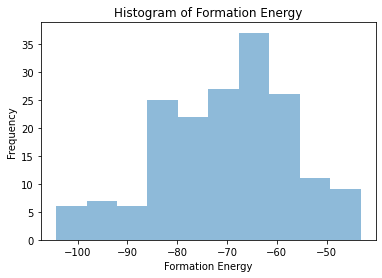

In [148]:
plt.hist(df_filtered_finished_data['formation_energy'],alpha=0.5)
plt.title('Histogram of Formation Energy')
plt.xlabel('Formation Energy')
plt.ylabel('Frequency')

In [149]:
# check for transition elements and halides in the formula

transition_elements_dict = {'Ti': 'titanium', 'V': 'vanadium','Cr': 'chromium','Mn': 'manganese','Fe': 'iron',
           'Co': 'cobalt','Ni': 'nickel','Cu': 'copper','Zr': 'zirconium','Nb': 'niobium',
           'Mo': 'molybdenum','Tc': 'technetium','Ru': 'ruthenium','Rh': 'rhodium','Pd': 'palladium',
           'Ag': 'silver','Hf': 'hafnium','Ta': 'tantalum','W': 'tungsten','Re': 'rhenium',
           'Os': 'osmium','Ir': 'iridium','Pt': 'platinum','Au': 'gold', 'Sc': 'scandium',
           'Zn': 'zinc','Y': 'yttrium','Cd': 'cadmium','Hg': 'mercury','Rf': 'rutherfordium',
           'Db': 'dubnium','Sg': 'seaborgium','Bh': 'bohrium','Hs': 'hassium','Mt': 'meitnerium',
           'Uun':'ununnilium','Uuu': 'unununium','Uub': 'unubium'}
transition_metal_symbol = list(transition_elements_dict.keys())
count = 0
for symbol in transition_metal_symbol:
    count = count +1

def classify_based_on_transition_metal( formula ):
   
   list_of_transition_metal = []
   for symbol in transition_metal_symbol:
    if(symbol in formula):
        list_of_transition_metal.append(symbol)
   return list_of_transition_metal



def has_key_in(string):
  return any(k in string for k in transition_elements_dict)

halides_dict = {'F': 'Fluoride', 'Cl': 'Chloride','Br': 'Bromide','I': 'Iodide'}
halide_symbol = list(halides_dict.keys())


def classify_based_on_halides( formula ):
   
   list_of_halides = []
   for symbol in halide_symbol:
    if(symbol in formula):
        list_of_halides.append(symbol)
   return list_of_halides


In [150]:
def check_for_transition_metal(df):
    # transition_element will contain a list of transition elements present
    rownum = len(df)
    transition_element = []

    for i in range(rownum) :
        tranistion_ele = []
        
        elements_present = df.iloc[i]['elements_present']
        
        tranistion_ele = classify_based_on_transition_metal(elements_present)
        
        transition_element.append(tranistion_ele)
        
    df['Transition_Element'] = transition_element
    
    return df

In [151]:
def check_for_halides(df):
    # halides will contain a halides that is present
    rownum = len(df)
    halides = []

    for i in range(rownum) :
        halide_ele = []
        
        elements_present = df.iloc[i]['elements_present']
        
        halide_ele = classify_based_on_halides(elements_present)
        
        halides.append(halide_ele) 
        
    df['Halides'] = halides
    
    return df

In [152]:
df_filtered_finished_data = check_for_transition_metal(df_filtered_finished_data)
df_filtered_finished_data = check_for_halides(df_filtered_finished_data)

count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

176


Count of transition element in dictionary ( x axis)
38
Presence of Transition Element in the data set :
{'Ti': 80, 'V': 0, 'Cr': 10, 'Mn': 0, 'Fe': 10, 'Co': 0, 'Ni': 17, 'Cu': 0, 'Zr': 14, 'Nb': 0, 'Mo': 12, 'Tc': 0, 'Ru': 18, 'Rh': 0, 'Pd': 14, 'Ag': 0, 'Hf': 0, 'Ta': 0, 'W': 0, 'Re': 0, 'Os': 0, 'Ir': 97, 'Pt': 0, 'Au': 17, 'Sc': 0, 'Zn': 15, 'Y': 0, 'Cd': 28, 'Hg': 0, 'Rf': 0, 'Db': 0, 'Sg': 0, 'Bh': 0, 'Hs': 0, 'Mt': 0, 'Uun': 0, 'Uuu': 0, 'Uub': 0}


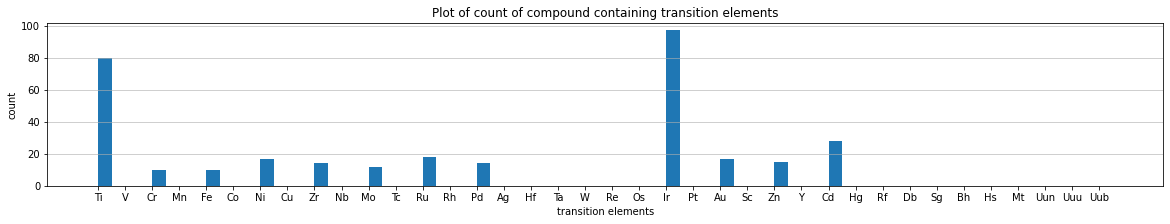

In [153]:
count = 0
d = { }

for ele in transition_metal_symbol:
    count = count +1
print("Count of transition element in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_transition_metal = np.array(df_filtered_finished_data.Transition_Element)


#print(list_of_normalized_moment)
#print(list_of_list_of_transition_metal)
#transition_metal_symbol = ['Fe']

for ele in transition_metal_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Transition_Element:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Transition Element in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing transition elements')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

Count of Halides in dictionary ( x axis)
4
Presence of Halides in the data set :
{'F': 0, 'Cl': 66, 'Br': 55, 'I': 55}


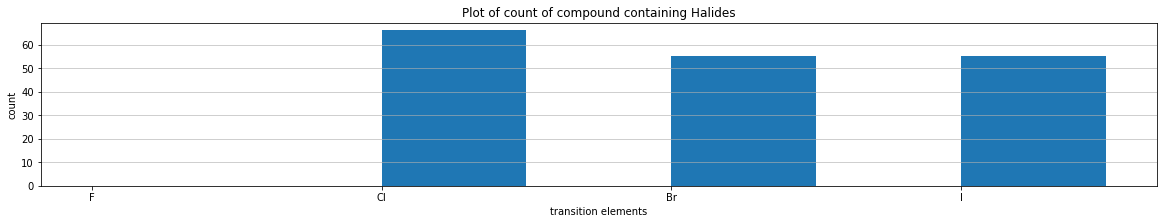

In [154]:
count = 0
d = { }

for ele in halide_symbol:
    count = count +1
print("Count of Halides in dictionary ( x axis)")    
print(count)
#df_filtered_finished_data.Transition_Element

list_of_list_of_halides = np.array(df_filtered_finished_data.Halides)

for ele in halide_symbol:
    count = 0
    for each_list in df_filtered_finished_data.Halides:
        if ele in each_list:
            count = count +1 
            #print(df_heatmap.normalized_moment)
    d[ele] = count
print("Presence of Halides in the data set :")
print(d)

plt.figure(figsize=(20, 3))  # width:20, height:3
#plt.bar(range(len(my_dict)), my_dict.values(), align='edge', width=0.3)

plt.bar(range(len(d)), list(d.values()), align='edge', width=0.5)
plt.xticks(range(len(d)), list(d.keys()))
plt.title('Plot of count of compound containing Halides')
plt.xlabel('transition elements')
plt.ylabel('count')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [158]:
def add_descriptors_from_mendeleev(df):
    # add descriptors from medeleev package 
    # each property is multiplied with the count of individual atom and then added to get the sum for the compound
    rownum = len(df)

    
    total_electron_count = [] # addition of atomic no.
    
    total_nvalence = []
    total_heat_of_formation = []
    total_unpaired_electrons = []
    total_electron_affinity = []
    total_en_ghosh = []
    total_en_pauling = []
    total_dipole_polarizability = []

    for i in range(rownum) :
        total_electron_count_temp = 0
        
        total_nvalence_temp = 0
        total_heat_of_formation_temp = 0
        total_unpaired_electrons_temp = 0
        total_electron_affinity_temp = 0
        total_en_ghosh_temp = 0
        total_en_pauling_temp = 0
        total_dipole_polarizability_temp = 0
        
        
        composition = df.iloc[i]['composition']
        elements_present = list(composition.keys())

        
        for elem in elements_present: 
             
            atom_count = composition.get(elem)
            
            atomic_number = element(str(elem)).atomic_number
            
            dipole_polarizability = element(str(elem)).dipole_polarizability
            electron_affinity =element(str(elem)).electron_affinity
            en_ghosh = element(str(elem)).en_ghosh
            en_pauling = element(str(elem)).en_pauling
            nvalence =  element(str(elem)).nvalence()
            heat_of_formation = element(str(elem)).heat_of_formation
            electronic_config = element(str(elem)).ec
            unpaired_electrons = electronic_config.unpaired_electrons()
            

            
            total_electron_count_temp = total_electron_count_temp + (atomic_number*atom_count)
            
            total_nvalence_temp = total_nvalence_temp + (nvalence*atom_count)
            total_heat_of_formation_temp = total_heat_of_formation_temp + (heat_of_formation*atom_count)
            total_unpaired_electrons_temp = total_unpaired_electrons_temp + (unpaired_electrons*atom_count)
            
            total_electron_affinity_temp = total_electron_affinity_temp + ((float(0 if electron_affinity is None else electron_affinity))*atom_count)
                
            total_en_ghosh_temp = total_en_ghosh_temp + (en_ghosh*atom_count)
            total_en_pauling_temp = total_en_pauling_temp + (en_pauling*atom_count)
            total_dipole_polarizability_temp = total_dipole_polarizability_temp + (dipole_polarizability*atom_count)
        
            
        total_electron_count.append(total_electron_count_temp)
        
        total_nvalence.append(total_nvalence_temp)
        total_heat_of_formation.append(total_heat_of_formation_temp)
        total_unpaired_electrons.append(total_unpaired_electrons_temp)
        total_electron_affinity.append(total_electron_affinity_temp)
        total_en_ghosh.append(total_en_ghosh_temp)
        total_en_pauling.append(total_en_pauling_temp)
        total_dipole_polarizability.append(total_dipole_polarizability_temp)
    
        
    df['total_electron_count'] = total_electron_count
    
    df['total_nvalence'] = total_nvalence
    df['total_heat_of_formation'] = total_heat_of_formation
    df['total_unpaired_electrons'] = total_unpaired_electrons
    df['total_electron_affinity'] = total_electron_affinity
    df['total_en_ghosh'] = total_en_ghosh
    df['total_en_pauling'] = total_en_pauling
    df['total_dipole_polarizability'] = total_dipole_polarizability
    
    return df

In [159]:
df_filtered_finished_data = add_descriptors_from_mendeleev(df_filtered_finished_data)
count_row = df_filtered_finished_data.shape[0]  # Gives number of rows
count_col = df_filtered_finished_data.shape[1]  # Gives number of columns
print(count_row)

176


In [160]:
df_filtered_finished_data.head()

,Formula,Stacking,name,data,LOOP+,NIONS,NKDIM,NBANDS,energy,stress,...,Transition_Element,Halides,total_electron_count,total_nvalence,total_heat_of_formation,total_unpaired_electrons,total_electron_affinity,total_en_ghosh,total_en_pauling,total_dipole_polarizability
1,Ir4Cl12,ABstacking,spin,"{'LOOP+': [444.2358, 103.2472, 147.5554, 183.8...","[444.2358, 103.2472, 147.5554, 183.8595]",32,34,176,"[-130.45522294, -130.45541663, -130.45530501, ...","[[[XX, YY, ZZ, XY, YZ, ZX], [[-1.03806, -1.109...",...,[Ir],[Cl],512.0,120.0,4131.624,24.0,49.607900,4.169876,46.72,391.2
3,Zr2Ti2I12,ABstacking,initial,"{'LOOP+': [1593.245, 326.0933, 396.8862, 308.7...","[1593.245, 326.0933, 396.8862, 308.7425, 377.3...",32,34,192,"[-128.8407076, -128.7730153, -128.2104543, -12...","[[[XX, YY, ZZ, XY, YZ, ZX], [[17.42665, 12.875...",...,"[Ti, Zr]",[I],760.0,100.0,3447.084,20.0,37.718442,3.130716,37.66,818.8
5,Ti4Br12,ABstacking,initial,"{'LOOP+': [696.6812, 209.2252, 150.3886, 121.2...","[696.6812, 209.2252, 150.3886, 121.282, 220.83...",32,34,192,"[-139.93458187, -140.59615028, -141.16280557, ...","[[[XX, YY, ZZ, XY, YZ, ZX], [[16.18543, 15.309...",...,[Ti],[Br],508.0,100.0,3234.200,20.0,40.679058,3.388548,41.68,652.0
7,Ni2Ir2Cl12,ABstacking,initial,"{'LOOP+': [609.0947, 129.4953, 82.5947, 64.488...","[609.0947, 129.4953, 82.5947, 64.4883, 65.5359...",32,34,176,"[-117.62589054, -117.6507844, -117.66163541, -...","[[[XX, YY, ZZ, XY, YZ, ZX], [[18.29158, 18.673...",...,"[Ni, Ir]",[Cl],414.0,122.0,3653.824,22.0,48.792300,3.962170,46.14,381.2
8,Mo2Ir2Br12,ABstacking,afm_so,"{'LOOP+': [2381.2066, 914.4853, 588.6001, 501....","[2381.2066, 914.4853, 588.6001, 501.4889, 904....",32,64,336,"[-134.12771631, -134.12783091, -134.12803681, ...","[[[XX, YY, ZZ, XY, YZ, ZX], [[-0.35855, -0.277...",...,"[Mo, Ir]",[Br],658.0,114.0,3998.160,30.0,44.986658,3.659748,44.24,534.0


In [162]:
# corelation between formation energy and descriptor
# more correlated if close to 1
print(df_filtered_finished_data.columns)
df_energy_heatmap = df_filtered_finished_data[['relaxed_Energy', 'sum_individual_energy', 'formation_energy',
                                              'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
                                           'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
                                           'total_en_pauling', 'total_dipole_polarizability']].copy()

Index(['Formula', 'Stacking', 'name', 'data', 'LOOP+', 'NIONS', 'NKDIM',
       'NBANDS', 'energy', 'stress', 'retry_count', 'lattice_vecs',
       'total charge', 'magnetization', 'position_force', 'volume of cell',
       'relaxed_Energy', 'sum_individual_energy', 'elements_present',
       'composition', 'formation_energy', 'Transition_Element', 'Halides',
       'total_electron_count', 'total_nvalence', 'total_heat_of_formation',
       'total_unpaired_electrons', 'total_electron_affinity', 'total_en_ghosh',
       'total_en_pauling', 'total_dipole_polarizability'],
      dtype='object')


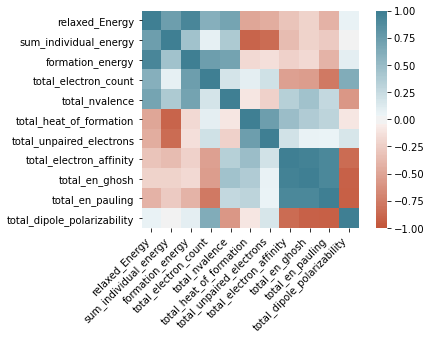

In [163]:
corr = df_energy_heatmap.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [164]:
df_filtered_finished_data.to_csv('AAX.csv')

In [70]:
rownum = len(df_filtered_finished_data.head())
print(type(df_filtered_finished_data.iloc[2]['magnetization']))
        
print(df_filtered_finished_data.iloc[2]['magnetization'])


        


<class 'list'>
[['x', ['s', 'p', 'd', 'tot'], [[0.011, 0.009, 0.886, 0.906], [0.011, 0.009, 0.834, 0.854], [0.011, 0.009, 0.809, 0.829], [0.011, 0.009, 0.788, 0.808], [0.011, 0.009, 0.833, 0.853], [0.011, 0.009, 0.841, 0.861], [0.011, 0.009, 0.868, 0.888], [0.011, 0.009, 0.836, 0.857], [-0.001, -0.016, 0.007, -0.01], [-0.001, -0.018, 0.007, -0.012], [-0.001, -0.017, 0.008, -0.01], [-0.001, -0.018, 0.007, -0.012], [-0.001, -0.017, 0.008, -0.01], [-0.001, -0.018, 0.008, -0.011], [-0.001, -0.017, 0.008, -0.01], [-0.001, -0.018, 0.008, -0.011], [-0.001, -0.019, 0.004, -0.015], [-0.001, -0.02, 0.004, -0.017], [-0.001, -0.016, 0.004, -0.012], [-0.001, -0.018, 0.004, -0.014], [-0.001, -0.018, 0.007, -0.011], [-0.001, -0.019, 0.007, -0.013], [-0.001, -0.016, 0.008, -0.009], [-0.001, -0.018, 0.007, -0.011], [-0.001, -0.016, 0.008, -0.009], [-0.001, -0.018, 0.007, -0.011], [-0.001, -0.017, 0.008, -0.01], [-0.001, -0.019, 0.007, -0.013], [-0.001, -0.018, 0.004, -0.014], [-0.001, -0.019, 0.004, -0

In [ ]:
visualization : 

In [ ]:
def get_magnetic_moment(df):
    """ parse magnetization value from magnetization raw data """
    
#     df['magmom_sites_tot'] = np.nan
    df['magmom_unitcell_x'] = np.nan
    df['magmom_unitcell_y'] = np.nan
    df['magmom_unitcell_z'] = np.nan
    
    for i in range(len(df)):
        magmom_sites_tot = np.nan
        magmom_unitcell = np.nan
        print(type(df['data'][i]))
        if ('magnetization' in df['data'][i]):
            raw_magmom = df['data'][i]['magnetization']

            if df.name[i] == 'initial' or df.name[i] == 'spin' or df.name[i] == 'afm':
                magmom = raw_magmom[-1]
                magmom_x = magmom[2]

                if isinstance(magmom_x[0], list):
                    magmom_x_sites_tot = [x[-1] for x in magmom_x]
                else:
                    magmom_x_sites_tot = [x[-1] for x in magmom]
                    
                magmom_x_unitcell = np.sum(magmom_x_sites_tot)
                magmom_sites_tot = magmom_x_sites_tot
                
                df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
#                 df['magmom_sites_tot'][i] = magmom_sites_tot

                
            elif df.name[i] == 'spin_so' or df.name[i] == 'afm_so':
                magmom = raw_magmom[-3:]
                magmom_x = magmom[0][2]
                magmom_y = magmom[1][2]
                magmom_z = magmom[2][2]

                if isinstance(magmom_x[0], list):
                    magmom_x_sites_tot = [x[-1] for x in magmom_x]
                    magmom_x_unitcell = np.sum(magmom_x_sites_tot)
                else:
                    magmom_x_sites_tot = magmom_x
                    magmom_x_unitcell = magmom_x

                if isinstance(magmom_y[0], list):
                    magmom_y_sites_tot = [x[-1] for x in magmom_y]
                    magmom_y_unitcell = np.sum(magmom_y_sites_tot)
                else:
                    magmom_y_sites_tot = magmom_y
                    magmom_y_unitcell = magmom_y

                if isinstance(magmom_z[0], list):
                    magmom_z_sites_tot = [x[-1] for x in magmom_z]
                    magmom_z_unitcell = np.sum(magmom_z_sites_tot)
                else:
                    magmom_z_sites_tot = magmom_z
                    magmom_z_unitcell = magmom_z

                magmom_sites_tot = np.asarray([magmom_x_sites_tot, magmom_y_sites_tot, magmom_z_sites_tot], object)
                
                df['magmom_unitcell_x'][i] = abs(magmom_x_unitcell)
                df['magmom_unitcell_y'][i] = abs(magmom_y_unitcell)
                df['magmom_unitcell_z'][i] = abs(magmom_z_unitcell)
#                 df['magmom_sites_tot'][i] = magmom_sites_tot

    return df         